## Study 5: Classification 
## Fraud Detection
### Goal:
- Predict fraudulent cases in credit card transactions.
### Approach:
- Search and retrieve relevant data from any source of your choice.
- Select relevant techniques to clean the data (missing values, outliers, wrong data types etc.)
- Choose the correct feature selection technique for a classification problem.
- Perform feature normalization on the data set.
- Use credit card transactions and the information on its account-holder as attributes (i.e., When does a customer buy, what does he buy, how often he pays on time, etc.)
- Label past transactions as fraud or fair transactions. This forms the class attribute.
- Build a model for the class of the transactions.
- Use this model to detect fraud by observing credit card transactions on an account.

## Group Members 3
| Member | Admission Number | 
| --------------- | --------------- | 
| Allan Matano |  |
| Carol Opiyo |  | 
| Faridah Nyaga |  | 
| Julie Ishimwe | 149483  | 
| Mercy Titus |  | 
| Sandra Otieno |  | 
| Stacy Njimu|  | 
| Rosemary Kanyoro |  | 


## Table of Contents



# Solution
## Data Description
The data used in this assignment was adopted from [Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection) in Kaggle. The data is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

~~~
NOTE:
In the approach given in the question it is indicated that we should label past transactions as fraud or fair transactions forming the target variable but we were able to get data with the fraud target variable. Therefore this is not a step that is addressed in this assignment. 
~~~

Only certain columns and from the kaggle dataset were incorporated into the dataset we used and they are:

1. Transaction Number
2. Customer ID	
3. Time stamp 	
4. Category
5. Amount Transacted 
6. First Name
7. Last
8. Gender
9. Street
10. City
11. Is fraud (Which is the target variable)

We added our own columns which are:

1. Credit Limit
2. Number of Transactions
3. Amounts received per day
4. Card Type
5. Authentication

**NOTE:** We changed the values in the amount transacted column to our own values. 

We extracted 287 entries from the kaggle dataset. However we added our own features as mentioned above. The 287 entries include both fraudulent and legitimate transactions. To make the columns we added meaningful we used the following logic.
1. We made it so that our dataset only contains 1 or 2 legitimate transactions every day in order to make the number of transactions column a useful predictor for fraud. The majority of the fraudulent transactions in our dataset had more than two transactions every day.
2. Each person received a particular card type with a set credit limit, and in some fraud cases, we included situations where the limit is exceeded in order to make the credit limit and card type useful predictors for fraud. For a particular card type, there are different credit limits, for example the signature card has a credit limit of both 400,000 and 500,000, the gold card has a credit limit of 600,000, 700,000 and 750,000 and the platinum card has a credit limit of 900,000 and 1,000,000. 
3. We introduced an authentication field that returns success after a successful transaction, and fail whenever a transaction is unsuccessful. To make this column a useful predictor, we only created fail cases for the fraudulent transactions.

## Libraries

In [715]:
#Installing libraries if they are not installed
#!pip3 install matplotlib
#!pip3 install scikit-learn
#!pip3 install seaborn
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install mlxtend
#!pip3 install statsmodels

In [716]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import datetime as dt
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from pandas.api.types import CategoricalDtype
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV
import statsmodels.api as sm

## Reading in Dataset

In [717]:
#Read in Data set
df = pd.read_csv("Group Work More Cases.csv")
df.head(3)

,Transaction_Number,Customer_ID,Time_stamp_changed,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received_per_day,Card_Type,Authentication
0,51250,6.59,1/30/2019 23:16,kids_pets,297820.0,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000,2,42187,Platinum,Success
1,51528,6.59,1/31/2019 5:41,grocery_net,687879.0,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000,3,98637,Platinum,Success
2,53779,6.59,2/1/2019 20:58,personal_care,738456.0,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000,1,21304,Platinum,Success


## Formating Dataset Columns

In [718]:
#Converting Datetime column to date time
df['Time_stamp_changed'] = pd.to_datetime(df['Time_stamp_changed'])

In [719]:
#Checking  the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Transaction_Number        287 non-null    int64         
 1   Customer_ID               287 non-null    float64       
 2   Time_stamp_changed        287 non-null    datetime64[ns]
 3   Category                  287 non-null    object        
 4   Amount_Transacted         287 non-null    float64       
 5   First                     287 non-null    object        
 6   Last                      287 non-null    object        
 7   Gender                    287 non-null    object        
 8   Street                    287 non-null    object        
 9   City                      287 non-null    object        
 10  Is_fraud                  287 non-null    int64         
 11  Credit_Limit              287 non-null    int64         
 12  No_of_Transactions    

In [720]:
#Recognising categorical variables as categorical.
#Converting categorical columns to categorical 
df['Category'] = pd.Categorical(df['Category'])
df['Gender'] = pd.Categorical(df['Gender'])
df['City'] = pd.Categorical(df['City'])
df['Credit_Limit'] = pd.Categorical(df['Credit_Limit'])
df['No_of_Transactions'] = pd.Categorical(df['No_of_Transactions'])
df['Card_Type'] = pd.Categorical(df['Card_Type'])
df['Is_fraud']= pd.Categorical(df['Is_fraud'])
df['Authentication'] = pd.Categorical(df['Authentication'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Transaction_Number        287 non-null    int64         
 1   Customer_ID               287 non-null    float64       
 2   Time_stamp_changed        287 non-null    datetime64[ns]
 3   Category                  287 non-null    category      
 4   Amount_Transacted         287 non-null    float64       
 5   First                     287 non-null    object        
 6   Last                      287 non-null    object        
 7   Gender                    287 non-null    category      
 8   Street                    287 non-null    object        
 9   City                      287 non-null    category      
 10  Is_fraud                  287 non-null    category      
 11  Credit_Limit              287 non-null    category      
 12  No_of_Transactions    

In [721]:
#Making new colums with codes instead of string
df['Category_code'] = df['Category'].cat.codes
df['Gender_code'] = df['Gender'].cat.codes
df['City_code'] = df['City'].cat.codes
df['Credit_Limit_code'] = df['Credit_Limit'].cat.codes
df['No_of_Transactions_code'] = df['No_of_Transactions'].cat.codes
df['Card_Type_code'] = df['Card_Type'].cat.codes
df['Is_fraud_code']= df['Is_fraud'].cat.codes
df['Authentication_code']= df['Authentication'].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Transaction_Number        287 non-null    int64         
 1   Customer_ID               287 non-null    float64       
 2   Time_stamp_changed        287 non-null    datetime64[ns]
 3   Category                  287 non-null    category      
 4   Amount_Transacted         287 non-null    float64       
 5   First                     287 non-null    object        
 6   Last                      287 non-null    object        
 7   Gender                    287 non-null    category      
 8   Street                    287 non-null    object        
 9   City                      287 non-null    category      
 10  Is_fraud                  287 non-null    category      
 11  Credit_Limit              287 non-null    category      
 12  No_of_Transactions    

In [722]:
#Checking which categories belong to which code
categories = df['Category_code'].groupby(df['Category']).unique().apply(pd.Series)
gender = df['Gender_code'].groupby(df['Gender']).unique().apply(pd.Series)
cities =df['City_code'].groupby(df['City']).unique().apply(pd.Series)
credit_limit = df['Credit_Limit_code'].groupby(df['Credit_Limit']).unique().apply(pd.Series)
transactions =df['No_of_Transactions_code'].groupby(df['No_of_Transactions']).unique().apply(pd.Series)
cards =df['Card_Type_code'].groupby(df['Card_Type']).unique().apply(pd.Series)
fraud=df['Is_fraud_code'].groupby(df['Is_fraud']).unique().apply(pd.Series)
auth = df['Authentication_code'].groupby(df['Authentication']).unique().apply(pd.Series)
print(categories)
print(gender)
print(cities) 
print(credit_limit)
print(transactions)
print(cards)
print(fraud)
print(auth)

                 0
Category          
entertainment    0
food_dining      1
gas_transport    2
grocery_net      3
grocery_pos      4
health_fitness   5
home             6
kids_pets        7
misc_net         8
misc_pos         9
personal_care   10
shopping_net    11
shopping_pos    12
travel          13
        0
Gender   
Female  0
Male    1
                         0
City                      
Alpharetta               0
Aurora                   1
Bigelow                  2
Browning                 3
Burns Flat               4
Campbell                 5
Cape Towm                6
Cape Town                7
Cazenovia                8
Collettsville            9
Coulee Dam              10
De Lancey               11
De Queen                12
Deadwood                13
Easton                  14
Elizabeth               15
Fields Landing          16
Gibsonville             17
Ironton                 18
Iselin                  19
Kirtland Afb            20
Laredo                  21
Louisvil

In [723]:
#Make new dataframe without string variables and Transaction Number column
df2 = df.drop(['Transaction_Number','First','Last','Street','Category', 'Gender', 'City','Credit_Limit', 'Card_Type', 'No_of_Transactions', 'Card_Type', 'Is_fraud', 'Authentication'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_ID               287 non-null    float64       
 1   Time_stamp_changed        287 non-null    datetime64[ns]
 2   Amount_Transacted         287 non-null    float64       
 3   Amounts_received_per_day  287 non-null    int64         
 4   Category_code             287 non-null    int8          
 5   Gender_code               287 non-null    int8          
 6   City_code                 287 non-null    int8          
 7   Credit_Limit_code         287 non-null    int8          
 8   No_of_Transactions_code   287 non-null    int8          
 9   Card_Type_code            287 non-null    int8          
 10  Is_fraud_code             287 non-null    int8          
 11  Authentication_code       287 non-null    int8          
dtypes: datetime64[ns](1), 

## Exploratory Data Analysis 

In [724]:
#Summary of the data
df2.describe(datetime_is_numeric=True)
#There is a wide range of values in the amount transacted column so we can't decide if outliers exist from the summary

,Customer_ID,Time_stamp_changed,Amount_Transacted,Amounts_received_per_day,Category_code,Gender_code,City_code,Credit_Limit_code,No_of_Transactions_code,Card_Type_code,Is_fraud_code,Authentication_code
count,287.000000,287,2.870000e+02,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,5.814007,2019-02-25 08:10:49.128919808,4.486565e+05,42971.885017,6.630662,0.383275,25.512195,3.160279,1.205575,0.993031,0.491289,0.986063
min,1.800000,2019-01-01 00:12:00,1.056900e+05,10003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.040000,2019-01-10 13:47:00,2.021625e+05,12342.000000,4.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,6.300000,2019-02-02 02:51:00,4.180090e+05,31044.000000,6.000000,0.000000,27.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,7.330000,2019-04-10 17:04:30,5.968660e+05,55323.000000,10.000000,1.000000,35.000000,5.000000,2.000000,2.000000,1.000000,1.000000
max,7.540000,2019-07-21 03:00:00,1.926072e+06,832630.000000,13.000000,1.000000,47.000000,6.000000,8.000000,2.000000,1.000000,1.000000
std,1.743172,NaN,2.548651e+05,53833.460028,3.580664,0.487034,12.234553,2.239683,1.471015,0.784433,0.500797,0.117435


In [725]:
#number of missing values in each column
df2.isnull().sum()

Customer_ID                 0
Time_stamp_changed          0
Amount_Transacted           0
Amounts_received_per_day    0
Category_code               0
Gender_code                 0
City_code                   0
Credit_Limit_code           0
No_of_Transactions_code     0
Card_Type_code              0
Is_fraud_code               0
Authentication_code         0
dtype: int64

In our dataset the columns we rae taking into consideration are;
1. Customer ID (Int)
2. Time_stamp_changed (Date time column converted to numeric)
3. Amount_Transacted(Int, ratio scale variable)
4. Amounts_received_per_day (Int, ratio variable)
5. Category (int, Nominal variable)
6. Gender (int, Nominal)
7. City (int, Nominal)
8. Credit_Limit (int, nominal)
9. No_of_Transactions (int, ordinal)
10. Card_Type (int, nominal)
11. Is_fraud (int, nominal) 
12. Authentication_code (int, nominal)


In [726]:
#function to detect outliers in numerical variables
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [727]:
#using the function to detect outliers in numerical variables
for column in df2:
    mycolumn= df2[column]
    outliers = find_outliers_IQR(mycolumn)
    print(f"number of outliers in {column} is: {str(len(outliers))}")

number of outliers in Customer_ID is: 0
number of outliers in Time_stamp_changed is: 0
number of outliers in Amount_Transacted is: 2
number of outliers in Amounts_received_per_day is: 1
number of outliers in Category_code is: 0
number of outliers in Gender_code is: 0
number of outliers in City_code is: 0
number of outliers in Credit_Limit_code is: 0
number of outliers in No_of_Transactions_code is: 6
number of outliers in Card_Type_code is: 0
number of outliers in Is_fraud_code is: 0
number of outliers in Authentication_code is: 4


In [728]:
#Getting exact outliers in the ratio scale variables which are amount transacted and amount recieved per day. 
#Note: The outliers in the nominal scale variables are meaningful so will not be treated.
outliers_Amount_T = find_outliers_IQR(df2['Amount_Transacted'])
print("max outlier value: "+ str(outliers_Amount_T.max()))
print("min outlier value: "+ str(outliers_Amount_T.min()))

outliers_Amount_R = find_outliers_IQR(df2['Amounts_received_per_day'])
print("max outlier value: "+ str(outliers_Amount_R.max()))
print("min outlier value: "+ str(outliers_Amount_R.min()))

max outlier value: 1926072.0
min outlier value: 1553907.0
max outlier value: 832630
min outlier value: 832630


In [729]:
#Replace outliers in amount transcated and amount recieved column using imputation as if they were missing values
#Identifying ids with outliers in amount transcated
id= df2[df2['Amount_Transacted']== 1926072.0]
#Giving outliers the value with missing value and dropping them
df2.loc[df2['Amount_Transacted'] ==1926072, 'Amount_Transacted'] = np.nan
df2.loc[df2['Amount_Transacted'] ==1553907, 'Amount_Transacted'] = np.nan
df2.loc[df2['Amounts_received_per_day'] == 832630, 'Amounts_received_per_day'] = np.nan
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 286
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_ID               284 non-null    float64       
 1   Time_stamp_changed        284 non-null    datetime64[ns]
 2   Amount_Transacted         284 non-null    float64       
 3   Amounts_received_per_day  284 non-null    float64       
 4   Category_code             284 non-null    int8          
 5   Gender_code               284 non-null    int8          
 6   City_code                 284 non-null    int8          
 7   Credit_Limit_code         284 non-null    int8          
 8   No_of_Transactions_code   284 non-null    int8          
 9   Card_Type_code            284 non-null    int8          
 10  Is_fraud_code             284 non-null    int8          
 11  Authentication_code       284 non-null    int8          
dtypes: datetime64[ns](1), 

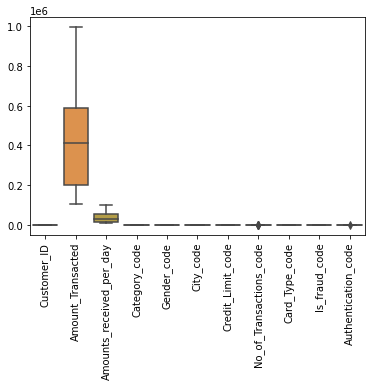

In [730]:
#box plot to check if outliers have been removed
#Removing timestamp column since it is a time stamp column
df3 = df2.drop(['Time_stamp_changed'], axis = 1)
sns.boxplot(data = df3)
plt.xticks(rotation=90);

## Feature Selection

In [731]:
#Converting Time variable to ordinal in all 3 datasets
df2['Time_stamp_changed']=df2['Time_stamp_changed'].apply(pd.Timestamp.toordinal)
# df_norm['Time_stamp_changed']=df_norm['Time_stamp_changed'].apply(pd.Timestamp.toordinal)
# df_stand['Time_stamp_changed']=df_stand['Time_stamp_changed'].apply(pd.Timestamp.toordinal)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 286
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               284 non-null    float64
 1   Time_stamp_changed        284 non-null    int64  
 2   Amount_Transacted         284 non-null    float64
 3   Amounts_received_per_day  284 non-null    float64
 4   Category_code             284 non-null    int8   
 5   Gender_code               284 non-null    int8   
 6   City_code                 284 non-null    int8   
 7   Credit_Limit_code         284 non-null    int8   
 8   No_of_Transactions_code   284 non-null    int8   
 9   Card_Type_code            284 non-null    int8   
 10  Is_fraud_code             284 non-null    int8   
 11  Authentication_code       284 non-null    int8   
dtypes: float64(3), int64(1), int8(8)
memory usage: 13.3 KB


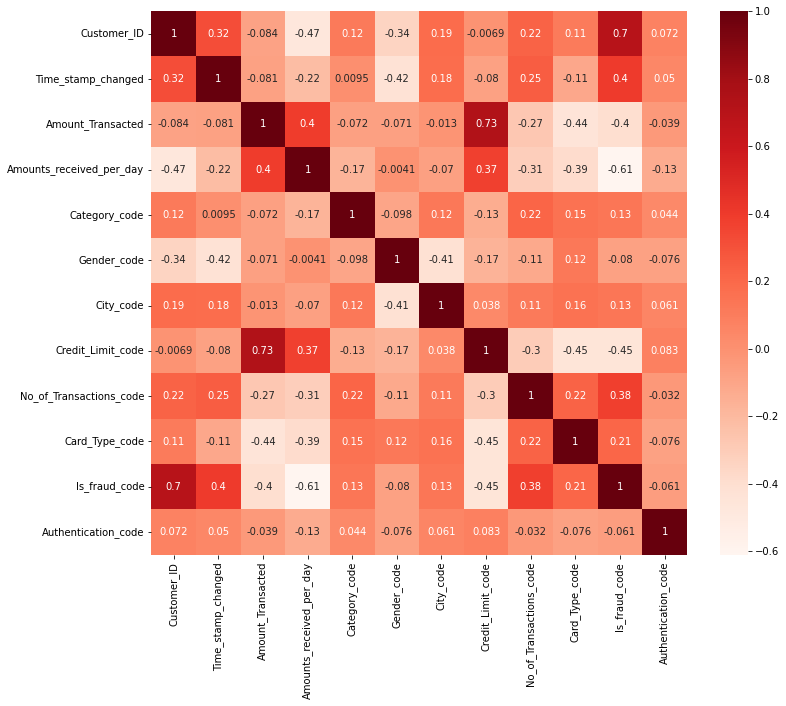

In [732]:
# Using Pearson Correlation of all features (including target)
plt.figure(figsize=(12,10))                      # creating a plot figure                              # compute correlation
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)   # plot heatmap
plt.show()                                       # show heatmap

From the plot above, we can see that credit limit and amount transacted sshow strong correlation so we test further with backward elimination below. 

In [733]:
# Choosing target variable and feature matrix for the 2 dataset (normalised and standardised)
target_norm = df2['Is_fraud_code']
features_norm = df2.drop("Is_fraud_code", axis=1)
# target_stand = df_stand['Is_fraud_code']
# features_stand = df_stand.drop("Is_fraud_code", axis=1)

### Backward Feature Elimination
This process goes through the following process
1. Select a P-value level which is selcected as 0.05
2. Fit the model with all features
3. Which feature has highest P-value?
4. Remove the feature with highest P-value
5. Fit the model again (Step 2) 
6. Repeat the Backward Elimination until we remove all features with p-value higher the significance level


The code below iterates through the predictors until only the significant variables are chosen



In [734]:
#Backward Elimination for normalised data
X = features_norm
y = target_norm
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Customer_ID', 'Time_stamp_changed', 'Amounts_received_per_day', 'Gender_code', 'City_code', 'Credit_Limit_code', 'No_of_Transactions_code', 'Card_Type_code', 'Authentication_code']


In [735]:
# #Backward Elimination for standardised data
# X = features_stand
# y = target_stand
# cols = list(X.columns)
# pmax = 1
# while (len(cols)>0):
#     p= []
#     X_1 = X[cols]
#     X_1 = sm.add_constant(X_1)
#     model = sm.OLS(y,X_1).fit()
#     p = pd.Series(model.pvalues.values[1:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>0.05):
#         cols.remove(feature_with_p_max)
#     else:
#         break
# selected_features_BE = cols
# print(selected_features_BE)

## Feature Normalisation

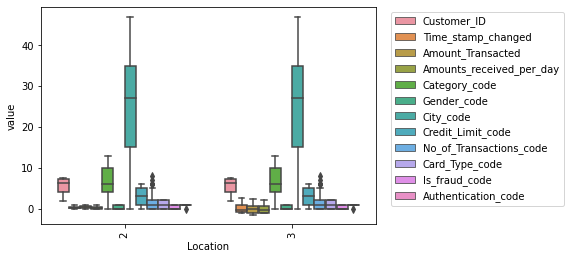

In [736]:
#Normalising Amount transacted and amount recieved
#Creating copy of dataset
df_norm = df2.copy()
cols = ['Amount_Transacted', 'Amounts_received_per_day', 'Time_stamp_changed']
df_norm[cols] = minmax_scale(df_norm[cols])
df_norm.head()

#Standardising Amount transacted and amount recieved
df_stand = df2.copy()
cols = ['Amount_Transacted', 'Amounts_received_per_day', 'Time_stamp_changed']
df_stand[cols] = StandardScaler().fit_transform(df_stand[cols])
df_stand.head()
#Comparing  normalised and starndised data without time column
#Removing time data from the datasets for box plot
# df3 = df3.assign(Location=1)
df_norm1 = df_norm.assign(Location=2)
df_stand1 = df_stand.assign(Location=3)

#Combining the 3 dataframes into 1 to have the box plot in one frame
cdf = pd.concat([df_norm1, df_stand1])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Variables'])

bx = sns.boxplot(x="Location", y="value", hue="Variables", data=mdf);    
bx.legend(bbox_to_anchor= (1.03, 1) );
plt.xticks(rotation = 90);

### Checking for oversampling or undersampling in the data for our target variable fraud
In all cases fraud is undersampled

In [737]:
#For normalised Dataset
legit_norm= df_norm[df_norm.Is_fraud_code== 0]
fraud_norm = df_norm[df_norm.Is_fraud_code == 1]
print(legit_norm.shape)
print(fraud_norm.shape)

(146, 12)
(138, 12)


In [738]:
#For standardised Dataset
legit_stand= df_stand[df_stand.Is_fraud_code== 0]
fraud_stand = df_stand[df_stand.Is_fraud_code == 1]
print(legit_stand.shape)
print(fraud_stand.shape)

(146, 12)
(138, 12)


In [739]:
#Making sample equal and recombining dataset
#Normalised dataset
legit_norm = legit_norm.sample(n = 138)
fraud_norm = fraud_norm.sample(n = 138)
df_norm2 = pd.concat([legit_norm,fraud_norm], axis=0)
df_norm2.info()

#Standardised dataset
legit_stand = legit_stand.sample(n = 138)
fraud_stand = fraud_stand.sample(n = 138)
df_stand2 = pd.concat([legit_stand,fraud_stand], axis=0)
df_stand2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 93 to 16
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               276 non-null    float64
 1   Time_stamp_changed        276 non-null    float64
 2   Amount_Transacted         276 non-null    float64
 3   Amounts_received_per_day  276 non-null    float64
 4   Category_code             276 non-null    int8   
 5   Gender_code               276 non-null    int8   
 6   City_code                 276 non-null    int8   
 7   Credit_Limit_code         276 non-null    int8   
 8   No_of_Transactions_code   276 non-null    int8   
 9   Card_Type_code            276 non-null    int8   
 10  Is_fraud_code             276 non-null    int8   
 11  Authentication_code       276 non-null    int8   
dtypes: float64(4), int8(8)
memory usage: 12.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 204 to 38
Da

From Backward selection we chose the predictor variables
1. 'Customer_ID',
2. 'Time_stamp_changed'
3. 'Amounts_received_per_day'
4. 'Gender_code'
5. 'City_code'
6. 'Credit_Limit_code'
7. 'No_of_Transactions_code'
8. 'Card_Type_code'
9. 'Authentication_code'

In [740]:
#Splitting the data into features and targets for normalised data
X_norm = df_norm2.drop(['Is_fraud_code', 'Amount_Transacted', 'Category_code'], axis=1)
Y_norm = df_norm2['Is_fraud_code']


In [741]:
#Splitting the data into features and targets for normalised data
X_stand= df_norm2.drop(['Is_fraud_code', 'Amount_Transacted', 'Category_code'], axis=1)
Y_stand = df_norm2['Is_fraud_code']

In [742]:
#Split data into testing and training data for normalised data
#We spilt the data by 20% test and 80%trains
#Stratify evenly distributes the fraudulent and legit cases equally
X_train, X_test, Y_train, Y_test = train_test_split(X_norm,Y_norm,test_size=0.2, stratify= Y_norm, random_state=2)
print(X_norm.shape,X_train.shape, X_test.shape)
print(Y_norm.shape, Y_train.shape, Y_test.shape)


(276, 9) (220, 9) (56, 9)
(276,) (220,) (56,)


In [743]:
#Model Training for normalised data
model = LogisticRegression( max_iter=1000)
#Training the logistic regression model with normalised training data 
model.fit(X_train, Y_train);

#Find the performance of the model with normalised data
#Accuracy Score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training data", training_data_accuracy)

#Accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on test data", testing_data_accuracy)


Accuracy on training data 0.9590909090909091
Accuracy on test data 0.9821428571428571


In [744]:
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        29

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



In [745]:
import itertools
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

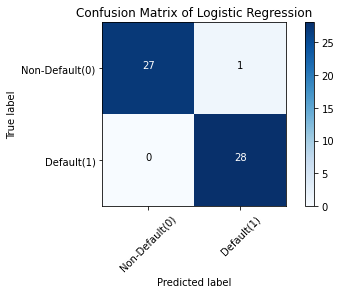

In [746]:
#Confusion Matrix
lr_matrix = confusion_matrix(Y_test, X_test_prediction, labels = [0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.show()

In [747]:
import datetime
import pickle
new_person = {
    'Customer_ID': 8.9,
    'Time_stamp_changed': [
               datetime.datetime(
                   2019, 
                   8, 
                   3, 
                   4, 
                   0, 
                   0, 
                   00000
              ).strftime("%Y-%m-%d %H:%M:%S")],
    'Amounts_received_per_day':90000,
   'Gender_code':1,
    'City_code':3,
    'Credit_Limit_code':1,
    'No_of_Transactions_code':5,
    'Card_Type_code':2,
    'Authentication_code':1
}
print(new_person)

{'Customer_ID': 8.9, 'Time_stamp_changed': ['2019-08-03 04:00:00'], 'Amounts_received_per_day': 90000, 'Gender_code': 1, 'City_code': 3, 'Credit_Limit_code': 1, 'No_of_Transactions_code': 5, 'Card_Type_code': 2, 'Authentication_code': 1}
